In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
movies_path = os.path.join(os.curdir, 'ml-20m')

In [64]:
ratings = pd.read_csv(movies_path+'/ratings.csv')
movies = pd.read_csv(movies_path+'/movies.csv')
tags = pd.read_csv(movies_path+'/tags.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [65]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.groupby('userId',as_index=False).rating.count().sort_values('rating',ascending=False)

In [12]:
# group movies, aggregate by avg rating
rat = ratings.groupby('movieId',as_index=False).rating.mean()

In [13]:
rat.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [66]:
import re
def extract_year(title):
    pattern = '\((\d+)\)'
    m = re.findall(pattern,title)
    try:
        return int(m[-1])
    except:
        return None

print(extract_year('Babe Ruth Story, The (1948) 	'))

1948


In [67]:
movies['year'] = movies.title.apply(extract_year)

In [77]:
movies[movies.year.isnull()]

,movieId,title,genres,year
10593,40697,Babylon 5,Sci-Fi,NaN
15646,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17341,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
23617,112406,Brazil: In the Shadow of the Stadiums,Documentary,NaN
23824,113190,Slaying the Badger,Documentary,NaN
24286,115133,Tatort: Im Schmerz geboren,Crime,NaN
24412,115685,National Theatre Live: Frankenstein,Drama|Fantasy,NaN
26115,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN
26127,125632,In Our Garden,(no genres listed),NaN
26180,125958,Stephen Fry In America - New World,(no genres listed),NaN


In [76]:
#movies.loc[movies.movieId==107434]['year']# = 2009
#movies.iloc[22679,3] = 1975

In [79]:
# drop movies without a year
movies = movies.dropna()

In [80]:
movies_rated = movies.merge(rat, on='movieId', how='inner')

In [82]:
movies_rated['year'] = movies_rated['year'].astype(int)

In [83]:
movies_rated.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [95]:
by_year = movies_rated.groupby('year',as_index=False).agg({'rating':'mean','title':'count'})

In [96]:
by_year.head()

,year,rating,title
0,1891,3.000000,1
1,1893,3.375000,1
2,1894,3.071429,2
3,1895,3.125000,2
4,1896,3.183036,2


In [97]:
by_year[by_year.title<20]

,year,rating,title
0,1891,3.000000,1
1,1893,3.375000,1
2,1894,3.071429,2
3,1895,3.125000,2
4,1896,3.183036,2
5,1898,3.850000,5
6,1899,3.625000,1
7,1900,3.166667,1
8,1901,5.000000,1
9,1902,3.738189,1


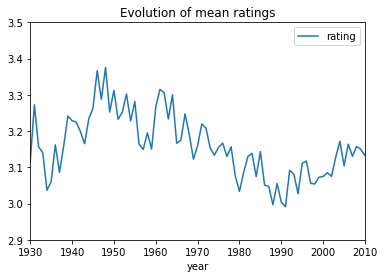

In [102]:
by_year.plot(kind='line', title='Evolution of mean ratings', x='year', y='rating', xlim = [1930,2010], ylim = [2.9,3.5])

In [103]:
horror = movies_rated[movies_rated.genres.str.contains('Horror')]

In [105]:
horror.rating.mean()

2.6967957652813723

In [107]:
movies_rated.genres.value_counts()

Drama                                              4416
Comedy                                             2251
Documentary                                        1876
Comedy|Drama                                       1241
Drama|Romance                                      1043
Comedy|Romance                                      741
Comedy|Drama|Romance                                594
Horror                                              556
Crime|Drama                                         435
Drama|Thriller                                      421
Drama|War                                           394
Horror|Thriller                                     372
Crime|Drama|Thriller                                299
Thriller                                            264
(no genres listed)                                  233
Western                                             207
Action|Drama                                        204
Comedy|Crime                                    

In [108]:
scifi = movies_rated[movies_rated.genres.str.contains('Sci-Fi')]

In [109]:
scifi.rating.mean()

2.8895105543669826